In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [3]:
total_eth_staked = 22_000_000
malicious_eth = total_eth_staked / 3
good_eth = total_eth_staked - malicious_eth
malicious_eth, good_eth

(7333333.333333333, 14666666.666666668)

In [6]:
malicious_vals = round(malicious_eth / 2048)
good_vals = round(good_eth / 32)
malicious_vals, good_vals

(3581, 458333)

In [10]:
total_vals = np.asarray(['bad'] * malicious_vals + ['good'] * good_vals)

In [17]:
att_committee_size = len(total_vals) // 32
att_committee_size

14434

In [59]:
malicious_props = []
for _ in range(1000):
    np.random.shuffle(total_vals)
    for i in range(32):
        curr_committee = total_vals[i*att_committee_size:(i+1)*att_committee_size]
        malicious_stake = 2048 * np.count_nonzero(curr_committee == 'bad')
        good_stake = 32 * np.count_nonzero(curr_committee == 'good')
        total_stake = malicious_stake + good_stake
        malicious_props.append(malicious_stake / total_stake)
malicious_props = np.asarray(malicious_props)
len(malicious_props)

32000

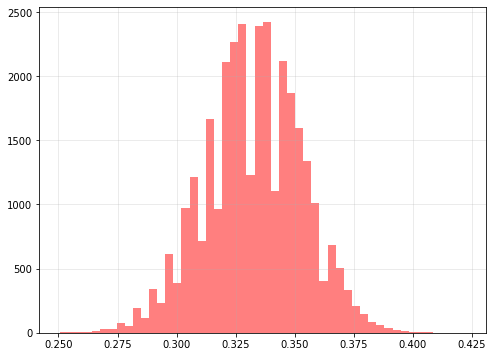

In [65]:
f, ax = plt.subplots(figsize=(8,6))
ax.hist(malicious_props, bins=50, color='red', alpha=0.5)
plt.show()

In [66]:
for q in [0.5, 0.75, 0.9, 0.99, 0.999]:
    print("q{} = {}".format(q, np.quantile(malicious_props, q)), end=' ')
    print()

q0.5 = 0.33355048859934855 
q0.75 = 0.34727098627513564 
q0.9 = 0.3585996682953068 
q0.99 = 0.3784018780975567 
q0.999 = 0.39373919513120637 
